# Model `AssoExCollective`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

# 1. Single matrix

In [2]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=30, seed=1000)
# idx = data.sample(factor_id=1, n_samples=50, seed=1000)

In [3]:
# from datasets import RatioSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

In [4]:
# from models import BMFCollective

# k = 5
# tau = 0.15
# w = 0.2

# X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

# model = BMFCollective(k=k, tau=tau, w=[w], p=[1], n_basis=None)
# model.fit(Xs_train=[X_train], factors=[[0, 1]], Xs_val=[X_val], Xs_test=[X_test], task='prediction', verbose=False, display=False)

In [5]:
# model.logs['updates']

In [6]:
# from utils import log2html
# log2html(model, 'updates')

In [7]:
# from utils import log2latex
# log2latex(model, 'updates')

# 2. Collective matrices

In [8]:
# real-world dataset

from datasets import MovieLensGenreCastUserData

data = MovieLensGenreCastUserData(size="1m")
data.load()

idx = data.sample(factor_id=0, n_samples=130, seed=1000)
idx = data.sample(factor_id=1, n_samples=150, seed=1000)

Xs = data.Xs

[I] Sampling axis 0 to size 130
[I]   sampling seed: 1000
[I]   sampling from: (6040, 3706)
[I]   sampling to  : (130, 3706)
[I] Sampling axis 0 with given indices
[I]   sampling from: (6040, 82)
[I]   sampling to  : (130, 82)
[I] Sampling axis 1 to size 150
[I]   sampling seed: 1000
[I]   sampling from: (130, 3706)
[I]   sampling to  : (130, 150)
[I] Sampling axis 1 with given indices
[I]   sampling from: (41, 3706)
[I]   sampling to  : (41, 150)
[I] Sampling axis 1 with given indices
[I]   sampling from: (9488, 3706)
[I]   sampling to  : (9488, 150)


In [9]:
# nagative sampling for all Xs
# only split the first X in Xs

from datasets import RatioSplit

s0 = RatioSplit(X=Xs[0], val_size=0.1, test_size=0.2, seed=1997)
# s0.negative_sample(
#     train_size=s0.pos_train_size, 
#     val_size=s0.pos_val_size, 
#     test_size=s0.pos_test_size, 
#     seed=2023, type='popularity')


from datasets import NoSplit

s1 = NoSplit(X=Xs[1], seed=1997)
s2 = NoSplit(X=Xs[2], seed=1997)

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 747
[I]   val_size     : 107
[I]   test_size    : 214
[I]   seed         : 1997
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 492
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1997
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 350
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1997


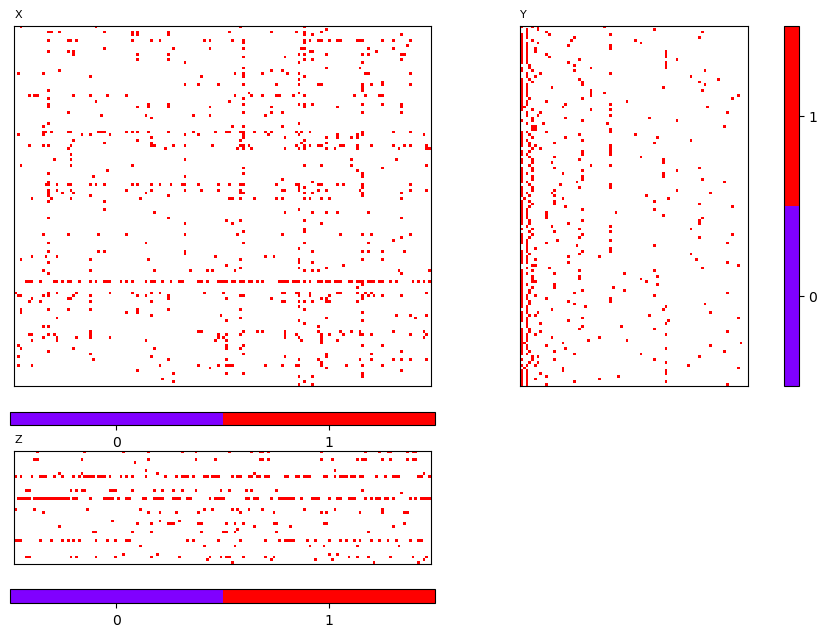

<Figure size 640x480 with 0 Axes>

In [10]:
from utils import show_matrix

X, Y, Z = s0.X_train, s1.X_train, s2.X_train
settings = [(X, [0, 0], 'X'), (Y, [0, 1], 'Y'), (Z, [1, 0], 'Z')]
show_matrix(settings, colorbar=True, discrete=True, center=True, clim=[0, 1], keep_nan=True)

In [16]:
from models import BMFCollective

k = 50
tau = 0.15
w = [0.1, 0.1, 0.1]
p = [0.5, 0.25, 0.25]

# negative samples only in X_0
# Xs_train = [split.X_train, data.Xs[1], data.Xs[2]]
# Xs_val = [split.X_val, data.Xs[1], data.Xs[2]]
# Xs_test = [split.X_test, data.Xs[1], data.Xs[2]]

# 1:1 negative sampling for all matrices
Xs_train = [s0.X_train, s1.X_train, s2.X_train]
Xs_val = [s0.X_val, s1.X_val, s2.X_val]
Xs_test = [s0.X_test, s1.X_test, s2.X_test]

model = BMFCollective(k=k, tau=tau, w=w, p=p, n_basis=None)
model.fit(Xs_train=Xs_train, factors=[[0, 1], [0, 2], [3, 1]], Xs_val=Xs_val, Xs_test=Xs_test, task='prediction', verbose=False, display=False)

[I] k            : 50
[I] tau          : 0.15
[I] w            : 3
[I] p            : 3
[I] n_basis      : None
[I] verbose      : False
[I] display      : False
[I] p            : [0.5, 0.25, 0.25]
[W] Missing n_basis, using all basis.
[I] n_basis      : None
[I] task         : prediction
None
[I] n_basis is updated to: 150


  0%|          | 0/50 [00:00<?, ?it/s]

None
None


None


None


None


None


None


None


None


None


None


None


None


None


  2%|▏         | 1/50 [00:11<09:46, 11.97s/it]                                                             

None
None


None


None


None


None


None


None


None


None


None


None


None


None


None


None


  4%|▍         | 2/50 [00:25<10:08, 12.67s/it]                                                       

None
None


None


None


None


None


None


None


None


None


None


None


  6%|▌         | 3/50 [00:33<08:18, 10.61s/it]                                                       

None
None


None


None


None


  8%|▊         | 4/50 [00:35<05:41,  7.42s/it]                                                   

[W] Score stops improving at k: 3
None
None


None


None


None


 10%|█         | 5/50 [00:38<04:13,  5.63s/it]                                                   

[W] Score stops improving at k: 4
None
None


None


None


None


 12%|█▏        | 6/50 [00:40<03:18,  4.52s/it]                                                   

[W] Score stops improving at k: 5
None
None


None


None


None


 14%|█▍        | 7/50 [00:42<02:41,  3.76s/it]                                                   

[W] Score stops improving at k: 6
None
None


None


None


None


 16%|█▌        | 8/50 [00:45<02:20,  3.34s/it]                                                   

[W] Score stops improving at k: 7
None
None


None


None


None


 18%|█▊        | 9/50 [00:47<02:03,  3.02s/it]                                                   

[W] Score stops improving at k: 8
None
None


None


None


None


 20%|██        | 10/50 [00:49<01:51,  2.78s/it]                                                  

[W] Score stops improving at k: 9
None
None


None


None


None


 22%|██▏       | 11/50 [00:52<01:43,  2.65s/it]                                                   

[W] Score stops improving at k: 10
None
None


None


None


None


 24%|██▍       | 12/50 [00:54<01:35,  2.51s/it]                                                   

[W] Score stops improving at k: 11
None
None


None


None


None


 26%|██▌       | 13/50 [00:56<01:33,  2.52s/it]                                                   

[W] Score stops improving at k: 12
None
None


None


None


None


 28%|██▊       | 14/50 [00:59<01:29,  2.48s/it]                                                   

[W] Score stops improving at k: 13
None
None


None


None


None


 30%|███       | 15/50 [01:02<01:34,  2.69s/it]                                                   

[W] Score stops improving at k: 14
None
None


None


None


None


 32%|███▏      | 16/50 [01:05<01:36,  2.83s/it]                                                   

[W] Score stops improving at k: 15
None
None


None


None


None


 34%|███▍      | 17/50 [01:08<01:31,  2.77s/it]                                                   

[W] Score stops improving at k: 16
None
None


None


None


None


 36%|███▌      | 18/50 [01:10<01:23,  2.62s/it]                                                   

[W] Score stops improving at k: 17
None
None


None


None


None


 38%|███▊      | 19/50 [01:13<01:19,  2.57s/it]                                                   

[W] Score stops improving at k: 18
None
None


None


None


None


 40%|████      | 20/50 [01:15<01:16,  2.53s/it]                                                   

[W] Score stops improving at k: 19
None
None


None


None


None


 42%|████▏     | 21/50 [01:18<01:14,  2.55s/it]                                                   

[W] Score stops improving at k: 20
None
None


None


None


None


 44%|████▍     | 22/50 [01:20<01:10,  2.51s/it]                                                   

[W] Score stops improving at k: 21
None
None


None


None


None


 46%|████▌     | 23/50 [01:22<01:05,  2.41s/it]                                                   

[W] Score stops improving at k: 22
None
None


None


None


None


 48%|████▊     | 24/50 [01:24<01:02,  2.39s/it]                                                   

[W] Score stops improving at k: 23
None
None


None


None


None


 50%|█████     | 25/50 [01:27<00:59,  2.38s/it]                                                   

[W] Score stops improving at k: 24
None
None


None


None


None


 52%|█████▏    | 26/50 [01:30<01:00,  2.52s/it]                                                   

[W] Score stops improving at k: 25
None
None


None


None


None


 54%|█████▍    | 27/50 [01:32<00:56,  2.47s/it]                                                   

[W] Score stops improving at k: 26
None
None


None


None


None


 56%|█████▌    | 28/50 [01:34<00:52,  2.40s/it]                                                   

[W] Score stops improving at k: 27
None
None


None


None


None


 58%|█████▊    | 29/50 [01:37<00:50,  2.38s/it]                                                   

[W] Score stops improving at k: 28
None
None


None


None


None


 60%|██████    | 30/50 [01:39<00:49,  2.49s/it]                                                   

[W] Score stops improving at k: 29
None
None


None


None


None


 62%|██████▏   | 31/50 [01:42<00:46,  2.43s/it]                                                   

[W] Score stops improving at k: 30
None
None


None


None


None


 64%|██████▍   | 32/50 [01:44<00:43,  2.42s/it]                                                   

[W] Score stops improving at k: 31
None
None


None


None


None


 66%|██████▌   | 33/50 [01:46<00:40,  2.35s/it]                                                   

[W] Score stops improving at k: 32
None
None


None


None


None


 68%|██████▊   | 34/50 [01:49<00:38,  2.38s/it]                                                   

[W] Score stops improving at k: 33
None
None


None


None


None


 70%|███████   | 35/50 [01:51<00:35,  2.39s/it]                                                   

[W] Score stops improving at k: 34
None
None


None


None


None


 72%|███████▏  | 36/50 [01:53<00:33,  2.36s/it]                                                   

[W] Score stops improving at k: 35
None
None


None


None


None


 74%|███████▍  | 37/50 [01:56<00:30,  2.37s/it]                                                   

[W] Score stops improving at k: 36
None
None


None


None


None


 76%|███████▌  | 38/50 [01:58<00:28,  2.35s/it]                                                   

[W] Score stops improving at k: 37
None
None


None


None


None


 78%|███████▊  | 39/50 [02:01<00:26,  2.44s/it]                                                   

[W] Score stops improving at k: 38
None
None


None


None


None


 80%|████████  | 40/50 [02:03<00:23,  2.36s/it]                                                   

[W] Score stops improving at k: 39
None
None


None


None


None


 82%|████████▏ | 41/50 [02:05<00:21,  2.37s/it]                                                   

[W] Score stops improving at k: 40
None
None


None


None


None


 84%|████████▍ | 42/50 [02:08<00:18,  2.37s/it]                                                   

[W] Score stops improving at k: 41
None
None


None


None


None


 86%|████████▌ | 43/50 [02:10<00:16,  2.32s/it]                                                   

[W] Score stops improving at k: 42
None
None


None


None


None


 88%|████████▊ | 44/50 [02:12<00:14,  2.39s/it]                                                   

[W] Score stops improving at k: 43
None
None


None


None


None


 90%|█████████ | 45/50 [02:15<00:11,  2.35s/it]                                                   

[W] Score stops improving at k: 44
None
None


None


None


None


 92%|█████████▏| 46/50 [02:17<00:09,  2.34s/it]                                                   

[W] Score stops improving at k: 45
None
None


None


None


None


 94%|█████████▍| 47/50 [02:19<00:06,  2.32s/it]                                                   

[W] Score stops improving at k: 46
None
None


None


None


None


 96%|█████████▌| 48/50 [02:22<00:04,  2.40s/it]                                                   

[W] Score stops improving at k: 47
None
None


None


None


None


 98%|█████████▊| 49/50 [02:24<00:02,  2.34s/it]                                                   

[W] Score stops improving at k: 48
None
None


None


None


None


100%|██████████| 50/50 [02:26<00:00,  2.94s/it]                                                   

[W] Score stops improving at k: 49


In [12]:
# model._finish()

In [13]:
# from utils import log2latex
# log2latex(model, 'updates')

In [14]:
# model.logs['updates'].to_pickle("BMFCollective_updates.pickle")
# model.logs['scores'].to_pickle("BMFCollective_scores.pickle")
# model.logs['results'].to_pickle("BMFCollective_results.pickle")

None


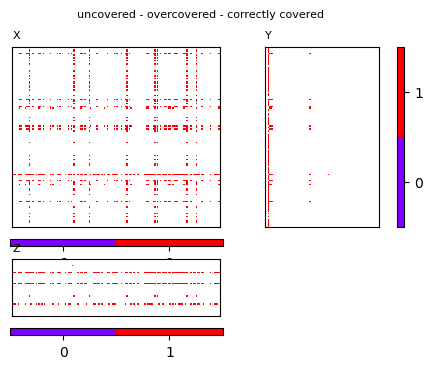

<Figure size 640x480 with 0 Axes>

In [15]:
from utils import show_matrix

model.predict_Xs()

settings = [(model.Xs_pd[0], [0, 0], 'X'), 
            (model.Xs_pd[1], [0, 1], 'Y'), 
            (model.Xs_pd[2], [1, 0], 'Z')]
show_matrix(settings, scaling=0.5, colorbar=True, discrete=True, center=True, title='uncovered - overcovered - correctly covered', clim=[0, 1])